https://sandbox.neo4j.com/

### Crime Investigation

Muestre en orden alfabético, los nombres de las primeras 10 personas
apellidadas ‘Smith’:

In [ ]:
MATCH (n:Person)
WHERE n.surname = "Smith"
RETURN n.name, n.surname
ORDER BY n.name ASC
LIMIT 10

Muestre la marca y modelos de los vehículos de año 2013:

In [ ]:
match (v:Vehicle{year: '2013'}) return v.make,v.model

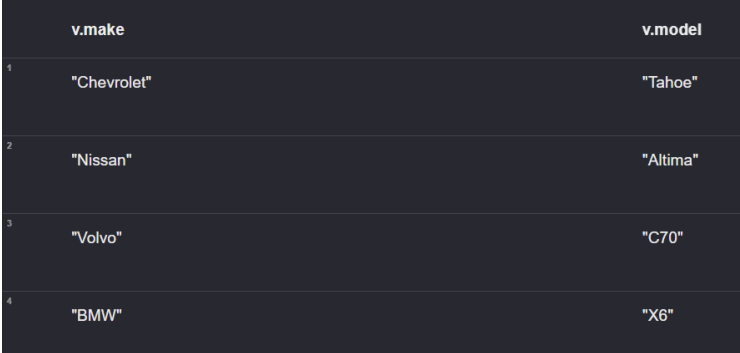

Muestre el nombre, apellido y rango de los oficiales cuyos apellidos
comiencen con ’Mc’, ordenados por rango (rank):

In [ ]:
MATCH (o:Officer) where o.surname contains "Mc" return o.name, o.surname,
o.rank order by o.rank desc

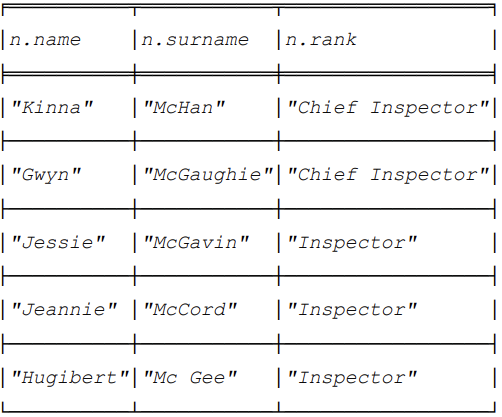

    Muestre el grafo de las locations en el área M30. Cuantos nodos hay?
210

In [ ]:
MATCH (l:Location) -[:LOCATION_IN_AREA]-> (a:Area {areaCode: 'M30'})
RETURN COUNT(l)


Muestre el grafo de todos que conocen a alguien que conoce a Gordon Craig:

In [ ]:
MATCH (p1:Person) -[:KNOWS]-> (p2:Person) -[:KNOWS]-> (p3:Person {surname: "Gordon", name: "Craig"})
RETURN p1, p2, p3

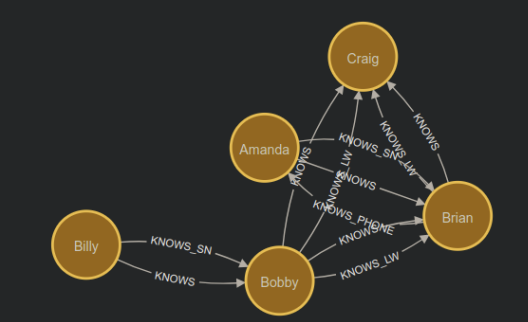

Muestre las personas que están a distancia 3 de Gordon Craig:

In [ ]:
match (p:Person)-[*3]-(gc:Person{surname: 'Gordon',name: 'Craig'}) return p


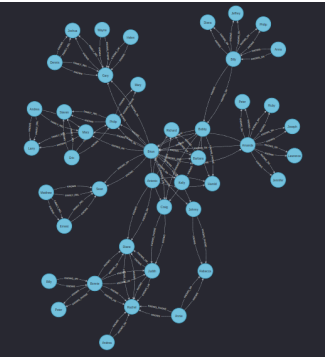

Muestre las personas conocidas de Roger Brooks que no participaron en ningún crimen:

In [ ]:
MATCH (p1:Person) -[:KNOWS]-> (p3:Person {surname: "Brooks", name: "Roger"})
WHERE NOT ((p1) -- (:Crime))
RETURN p1, p3

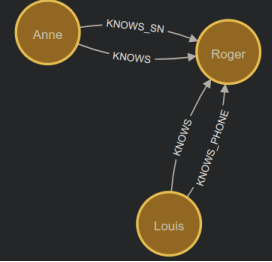

Muestre el camino más corto de Judith Moore a Richard Green:

In [ ]:
MATCH s=shortestPath((a:Person{surname: 'Moore',name: 'Judith'})-[*]-(b:Person{surname: 'Green',name: 'Richard'}))
return s

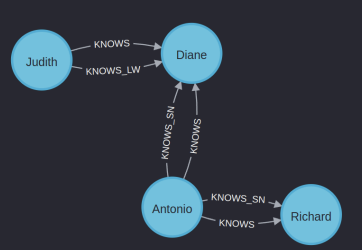

Encuentre los oficiales que investigaron los crímenes cometidos en 165
Laurel Street:

In [ ]:
MATCH (o:Officer)<-[:INVESTIGATED_BY]-(c:Crime)-[:OCCURRED_AT]-(l:Location{address:"165 Laurel Street"})
RETURN o,c,l

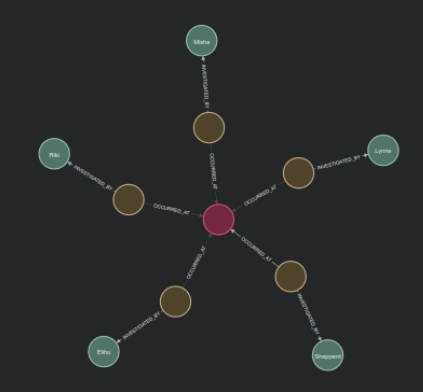

Obtenga el modelo, marca y año del auto más viejo de la base:

In [ ]:
MATCH (v:Vehicle)
WITH MIN(v.year) as masviejo
MATCH (v1:Vehicle)
WHERE v1.year = masviejo
RETURN v1.make, v1.model, v1.year

¿A qué distancia se encuentra el auto más viejo de Roger Brooks?

In [ ]:
match (v:Vehicle) with MIN(v.year) as oldest
match (v:Vehicle),(p:Person{name: 'Roger',surname: 'Brooks'}) where v.year = oldest
match s=shortestPath((v)-[*]-(p))
return length(s)

Cuantas personas hay en la base? Cuantos tiene teléfono? Cuantos
mail?

In [ ]:
MATCH (n:Person)
WITH COUNT(*) AS cant_pers
MATCH (m:Email)
WITH COUNT(*) AS cant_email,cant_pers
MATCH(p:Phone)
WITH COUNT(*) AS cant_tel, cant_email,cant_pers
RETURN cant_pers,cant_tel,cant_email